In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import matplotlib.mlab as mlab
from scipy.stats import norm
import pandas as pd
import seaborn as sns

In [51]:
data1 = pd.read_csv("over_point_to_user.csv",index_col=[0])
data2 = data1.loc[:,["user_id","over_point"]]
data2 = data2.drop_duplicates(subset="user_id")
data2 = data2.sort_values("over_point",ascending=False)
data2.index = range(len(data2))

data3 = data2.loc[180:184]

del data1["over_point"]

data4 = pd.merge(data1,data3,on="user_id")
data4
hours = []
for i in range(len(data4)):
    hours.append(int(data4.iloc[i].loc["hours"]))
data4["hours"] = hours
data4 = data4.drop_duplicates(subset=["case_id","user_id"],keep="last")

In [52]:
data5 = data4[data4["user_id"]==data3.iloc[0,0]]
data6 = data4[data4["user_id"]==data3.iloc[1,0]]
data7 = data4[data4["user_id"]==data3.iloc[2,0]]
data8 = data4[data4["user_id"]==data3.iloc[3,0]]
data9 = data4[data4["user_id"]==data3.iloc[4,0]]

In [53]:
a = pd.DataFrame(index = range(1,45))
data5_days = data5["days"].value_counts()
data5_days = pd.merge(a,data5_days,left_index=True,right_index=True,how="outer")
data5_days = data5_days.fillna(0)
data6_days = data6["days"].value_counts()
data6_days = pd.merge(a,data6_days,left_index=True,right_index=True,how="outer")
data6_days = data6_days.fillna(0)
data7_days = data7["days"].value_counts()
data7_days = pd.merge(a,data7_days,left_index=True,right_index=True,how="outer")
data7_days = data7_days.fillna(0)
data8_days = data8["days"].value_counts()
data8_days = pd.merge(a,data8_days,left_index=True,right_index=True,how="outer")
data8_days = data8_days.fillna(0)
data9_days = data9["days"].value_counts()
data9_days = pd.merge(a,data9_days,left_index=True,right_index=True,how="outer")
data9_days = data9_days.fillna(0)
data_days = data5_days + data6_days + data7_days + data8_days + data9_days
data_days.index = range(1,45)

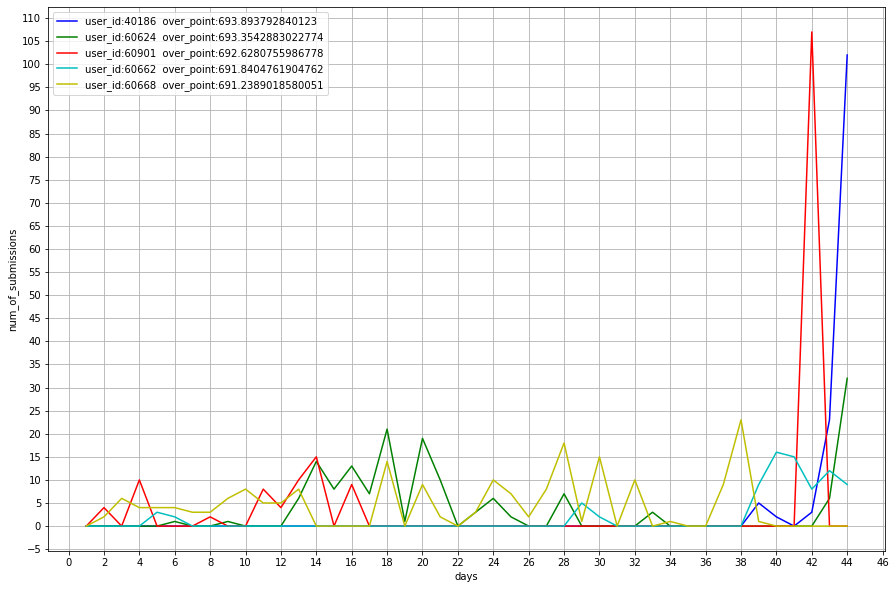

In [54]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.plot(data5_days,"b",label="user_id:"+str(data3.iloc[0,0])+"  over_point:"+str(data3.iloc[0,1]))
ax.plot(data6_days,"g",label="user_id:"+str(data3.iloc[1,0])+"  over_point:"+str(data3.iloc[1,1]))
ax.plot(data7_days,"r",label="user_id:"+str(data3.iloc[2,0])+"  over_point:"+str(data3.iloc[2,1]))
ax.plot(data8_days,"c",label="user_id:"+str(data3.iloc[3,0])+"  over_point:"+str(data3.iloc[3,1]))
ax.plot(data9_days,"y",label="user_id:"+str(data3.iloc[4,0])+"  over_point:"+str(data3.iloc[4,1]))
x_major_locator=plt.MultipleLocator(2)
y_major_locator=plt.MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.legend(loc = "best")
ax.set_xlabel("days")
ax.set_ylabel("num_of_submissions")
fig.savefig("temp/days_l.png")

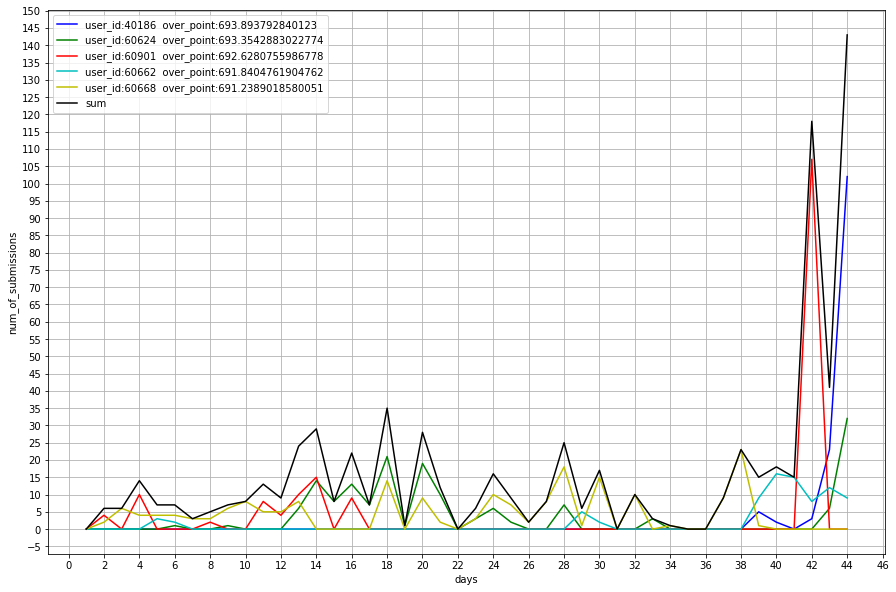

In [55]:
ax.plot(data_days,"black",label="sum")
ax.legend(loc = "best")
fig.savefig("temp/days_with_sum_l.png")
fig

In [56]:
b = pd.DataFrame(index = np.arange(0,24))
data5_hours = data5["hours"].value_counts()
data5_hours = pd.merge(b,data5_hours,left_index=True,right_index=True,how="outer")
data5_hours = data5_hours.fillna(0)
data6_hours = data6["hours"].value_counts()
data6_hours = pd.merge(b,data6_hours,left_index=True,right_index=True,how="outer")
data6_hours = data6_hours.fillna(0)
data7_hours = data7["hours"].value_counts()
data7_hours = pd.merge(b,data7_hours,left_index=True,right_index=True,how="outer")
data7_hours = data7_hours.fillna(0)
data8_hours = data8["hours"].value_counts()
data8_hours = pd.merge(b,data8_hours,left_index=True,right_index=True,how="outer")
data8_hours = data8_hours.fillna(0)
data9_hours = data9["hours"].value_counts()
data9_hours = pd.merge(b,data9_hours,left_index=True,right_index=True,how="outer")
data9_hours = data9_hours.fillna(0)
data_hours = data5_hours + data6_hours + data7_hours + data8_hours + data9_hours
data_hours.index = range(24)

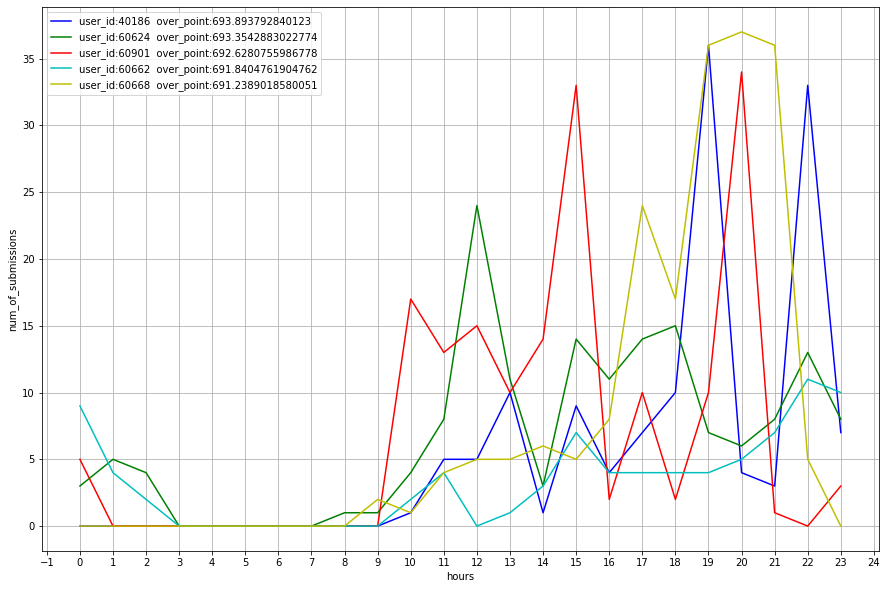

In [57]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.grid(True)
ax.plot(data5_hours,"b",label="user_id:"+str(data3.iloc[0,0])+"  over_point:"+str(data3.iloc[0,1]))
ax.plot(data6_hours,"g",label="user_id:"+str(data3.iloc[1,0])+"  over_point:"+str(data3.iloc[1,1]))
ax.plot(data7_hours,"r",label="user_id:"+str(data3.iloc[2,0])+"  over_point:"+str(data3.iloc[2,1]))
ax.plot(data8_hours,"c",label="user_id:"+str(data3.iloc[3,0])+"  over_point:"+str(data3.iloc[3,1]))
ax.plot(data9_hours,"y",label="user_id:"+str(data3.iloc[4,0])+"  over_point:"+str(data3.iloc[4,1]))
ax.legend(loc = "best")
ax.set_xlabel("hours")
ax.set_ylabel("num_of_submissions")
x_major_locator=plt.MultipleLocator(1)
y_major_locator=plt.MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
fig.savefig("temp/hours_l.png")

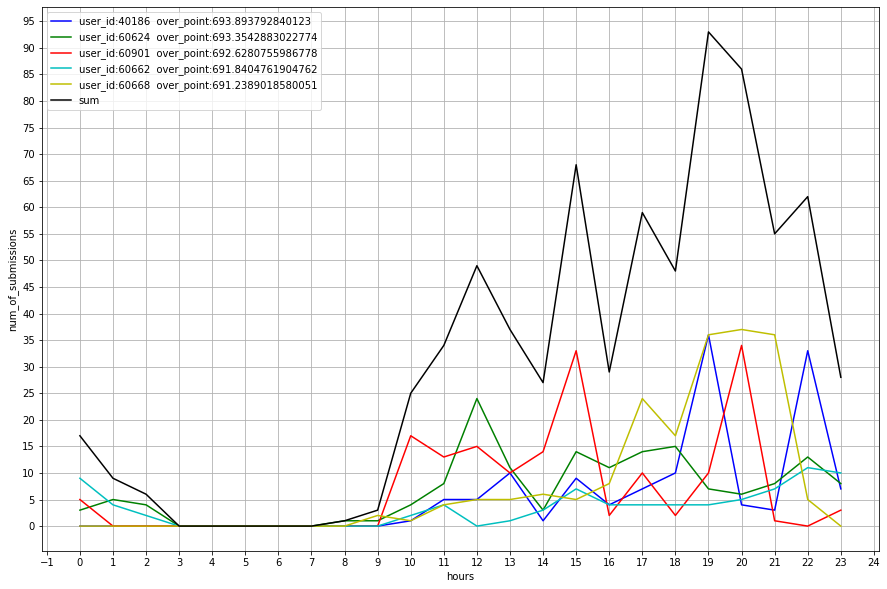

In [58]:
ax.plot(data_hours,"black",label="sum")
ax.legend(loc = "best")
fig.savefig("temp/hours_with_sum_l.png")
fig